# ML_CyberAttack Predictor project


Import libraries :
link to ua-parser library : https://github.com/ua-parser/uap-python



In [114]:
import pandas as pd
from uaparser import UAParser as parse_ua

# DATA CLEAN

In [115]:
dataset_path = 'Data/cybersecurity_attacks.csv'
df = pd.read_csv(dataset_path)
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


## Device Information
Device information column return the user agent information or the destination address \
User-agent provide information about the devices : OS, Browsers and device type and brand \
#### **Observation** :
ua-string is unusable as it is an aggregation of string values. Furthermore, some information  \
could lead to confusion as the prefix which could be interpreted as the browser, but which \
is in fact the compatibility of the rendering browser engine. \
*Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like Mac OS X; tg-TJ) AppleWebKit/534.33.5 (KHTML, like Gecko) Version/4.0.5 Mobile/8B116 Safari/6534.33.5*  \
For instance this ua above refer to an ipod with Safari browser version as 4.0.5. and an Iphone OS 3.0
#### *Data cleaning*
Extraction of the name and version of the OS, Browser and the type of device to figure out if one is susceptible to \
a specific attack. \
In order to do so, we decide to use the library ua_parser to extract relevant information.  \



In [116]:
# Parse the Device Information column to get a new column "parsed_os"
def version_os(row):
    ua = row['Device Information']
    parsed_ua = parse_ua(ua)
    os_name = parsed_ua.os['name']
    os_version = parsed_ua.os['version']
    version = os_version.split(".")[0] # return the major of the version (first numbers)

    return f"{os_name} {version}"

def version_browser(row):

    ua = row['Device Information']
    parsed_ua = parse_ua(ua)
    browser_name = parsed_ua.browser['name']
    browser_version = parsed_ua.browser['version']
    version = browser_version.split(".")[0]

    return f"{browser_name} {version}"

def type_device(row):

    ua = row['Device Information']
    parsed_ua = parse_ua(ua)
    device_type = parsed_ua.device['type']
    if device_type is None:
        device_type = "computer"
    return device_type


df['version_os'] = df.apply(version_os, axis=1)
df['version_browser'] = df.apply(version_browser, axis=1)
df['type_device'] = df.apply(type_device, axis=1)

## Visualization

Palette creation for visual
color selection : https://colorbrewer2.org/#

In [122]:
import seaborn as sns
palette_os = ['#ca0020','#f4a582','#ffffff','#bababa','#404040']
sns.set_palette(palette_os)


## Data

In [118]:
import matplotlib.pyplot as plt


In [119]:
df_view = df
def version_os_name(row):
    ua = row['Device Information']
    parsed_ua = parse_ua(ua)
    os_name = parsed_ua.os['name']
    return os_name

def version_browser_name(row):
    ua = row['Device Information']
    parsed_ua = parse_ua(ua)
    browser_name = parsed_ua.browser['name']
    return browser_name

def type_device(row):
    ua = row['Device Information']
    parsed_ua = parse_ua(ua)
    device_type = parsed_ua.device['type']
    if device_type is None:
        device_type = "computer" # for null value force as 'computer'
    return device_type

df_view['version_os_name'] = df_view.apply(version_os_name, axis=1)
df_view['version_browser_name'] = df_view.apply(version_browser_name, axis=1)
df_view['type_device'] = df_view.apply(type_device, axis=1)


In [120]:
dict_os = df_view['version_os_name'].value_counts().to_dict()
data = dict_os.values()
labels = dict_os.keys()
print(data)
print(labels)

dict_values([17953, 7171, 5813, 5774, 3289])
dict_keys(['Windows', 'Linux', 'Mac OS', 'iOS', 'Android'])


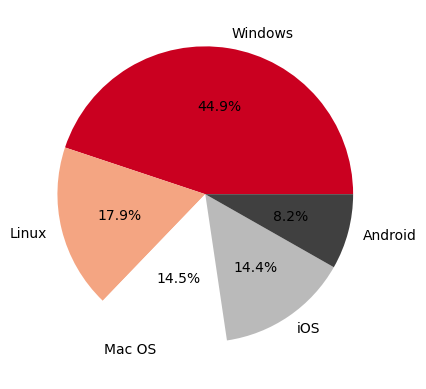

In [129]:
plot = plt.pie(data, labels=labels, autopct='%1.1f%%',colors =sns.color_palette())